# IMPORTING LIBRARIES📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\Domain\CodTech Internship\Week 3\Churn_Predictions.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6180,6181,15734892,Fennell,579,Spain,Male,37,4,0.00,2,1,1,32246.63,0
2213,2214,15803749,DeRose,498,Germany,Female,41,4,87541.06,2,1,1,12577.21,1
3700,3701,15747345,Bergamaschi,678,France,Female,22,6,118064.93,2,1,1,195424.01,0
5570,5571,15645847,P'eng,569,Germany,Male,35,2,109196.66,3,1,0,109393.19,1
5956,5957,15594928,Pagnotto,798,Germany,Female,38,4,129055.13,1,1,0,157147.59,0


In [3]:
df.shape

(10000, 14)

#### Dropping unwanted columns

In [4]:
df1=df.drop(['RowNumber','CustomerId','Surname'],axis='columns')
df1.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5818,592,Germany,Female,34,6,102143.93,2,1,1,102628.98,0
8877,812,Spain,Female,24,1,92476.88,1,0,0,83247.14,0
3531,408,France,Female,84,8,87873.39,1,0,0,188484.52,1


## Exploratory data analysis

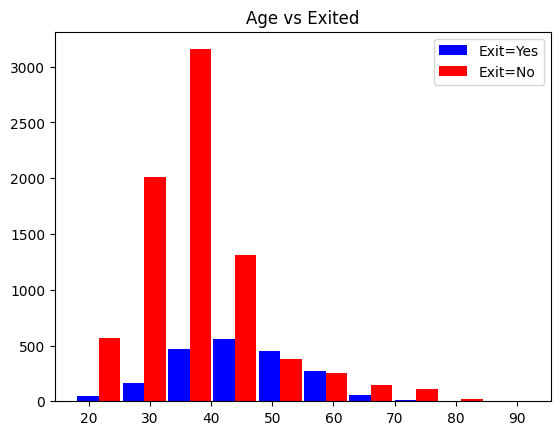

In [5]:
age_exit_yes =  df[df['Exited'] == 1].Age
age_exit_no= df[df['Exited'] == 0].Age
plt.hist([age_exit_yes, age_exit_no], rwidth=0.95, color=['blue','red'],label=['Exit=Yes','Exit=No'])
plt.legend()
plt.title("Age vs Exited")
plt.show()

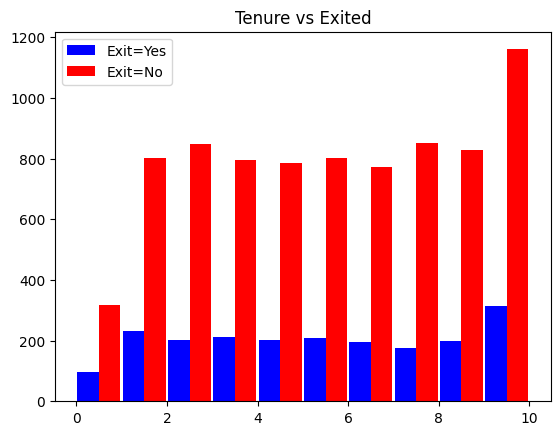

In [6]:
tenure_exit_yes =  df[df['Exited'] == 1].Tenure
tenure_exit_no= df[df['Exited'] == 0].Tenure
plt.hist([tenure_exit_yes, tenure_exit_no], rwidth=0.95, color=['blue','red'],label=['Exit=Yes','Exit=No'])
plt.legend()
plt.title("Tenure vs Exited")
plt.show()

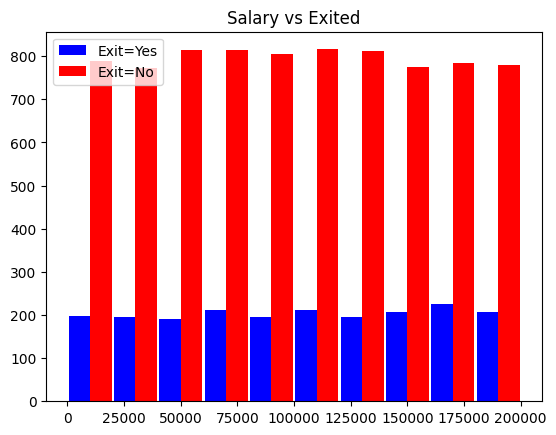

In [7]:
salary_exit_yes =  df[df['Exited'] == 1].EstimatedSalary
salary_exit_no= df[df['Exited'] == 0].EstimatedSalary
plt.hist([salary_exit_yes, salary_exit_no], rwidth=0.95, color=['blue','red'],label=['Exit=Yes','Exit=No'])
plt.legend()
plt.title("Salary vs Exited")
plt.show()

In [8]:
def find_unique(df):
    for col in df:
        print(f'{col}: {df[col].unique()}')

In [9]:
find_unique(df1)

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df1[to_scale] = scaler.fit_transform(df1[to_scale])

In [12]:
find_unique(df1)

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

### One Hot Encoding
 
- As the model cannot understand text, we use One Hot Encoding to transform the values to 0's and 1's.
- By doing this , the model can easily understand the difference between each column.

In [13]:
to_dummy = ['Geography']

In [14]:
final = pd.get_dummies(data=df1,columns=to_dummy,dtype = 'float')
final.sample(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5143,0.592,Male,0.175676,0.2,0.000000,0.0,1,1,0.854131,1,0.0,0.0,1.0
9323,0.588,Male,0.432432,0.9,0.306168,1.0,1,0,0.981892,1,1.0,0.0,0.0


In [15]:
final['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [16]:
final.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1.0,0.0,0.0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.0,0.0,1.0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.0,0.0,0.0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1.0,0.0,0.0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.0,0.0,1.0


In [17]:
final.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1.0,0.0,0.0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.0,0.0,1.0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.0,0.0,0.0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1.0,0.0,0.0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.0,0.0,1.0


In [17]:
find_unique(final)

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [18]:
y = final['Exited']
X = final.drop(['Exited'],axis='columns')

#### Train/Test/Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,random_state = 5)
len(X_train.columns)

12

In [21]:
y_train.shape
X_train.shape

(7000, 12)

## Keras Model

In [22]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(1, input_shape=(12,),activation = 'sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.7464 - loss: 0.5670
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.7924 - loss: 0.4792
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.7984 - loss: 0.4566
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.7979 - loss: 0.4505
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8071 - loss: 0.4346
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8196 - loss: 0.4085
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.8256 - loss: 0.4036
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8393 - loss: 0.3764
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8444 - loss: 0.3658
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8424 - loss: 0.3624
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.8454 - loss: 0.3681
Epoch 12/100
219/21

In [23]:
model.evaluate(X_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8525 - loss: 0.3537


[0.3453729748725891, 0.8583333492279053]

In [24]:
yp = model.predict(X_test)
yp

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step


array([[0.02464378],
       [0.03103545],
       [0.08338545],
       ...,
       [0.01625413],
       [0.00150768],
       [0.0848589 ]], dtype=float32)

In [25]:
len(yp)

3000

In [26]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:
len(y_test)

3000

In [28]:
len(y_pred)

3000

### Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2403
           1       0.73      0.46      0.56       597

    accuracy                           0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



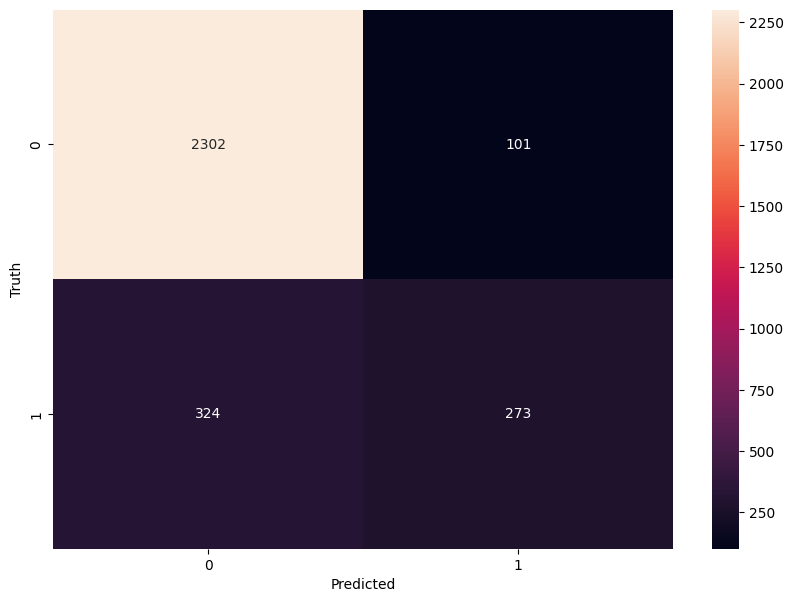

In [30]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Defining function for ANN

In [32]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(12, input_shape=(12,),activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(1, input_shape=(12,),activation = 'sigmoid'),
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    
    model.fit(X_train, y_train, epochs=100)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

# Undersampling

In [33]:
count_class_0, count_class_1 = final.Exited.value_counts()
count_class_0 , count_class_1

(7963, 2037)

In [34]:
df_0 = final[final['Exited']==0]
df_1 = final[final['Exited']==1]

In [35]:
df_under_0 = df_0.sample(count_class_1)
df_under = pd.concat([df_under_0,df_1])
df_under.Exited.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [36]:
X = df_under.drop('Exited',axis = 'columns')
y = df_under['Exited']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=5)

In [38]:
y_train.value_counts()

Exited
0    1637
1    1622
Name: count, dtype: int64

In [39]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.5394 - loss: 0.6928
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.6024 - loss: 0.6673
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.6269 - loss: 0.6450
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.6635 - loss: 0.6174
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.6627 - loss: 0.6164
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.6686 - loss: 0.6110
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.6887 - loss: 0.6005
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.6907 - loss: 0.5984
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.6869 - loss: 0.5917
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.6979 - loss: 0.5909
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6968 - loss: 0.5868
Epoch 12/100
102/10

# Oversampling

In [40]:
df_over_1 = df_1.sample(count_class_0,replace = True)
df_over = pd.concat([df_over_1,df_0])
df_over.Exited.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [41]:
X = df_over.drop(['Exited'],axis = 'columns')
y = df_over.Exited

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=5)

In [43]:
y_preds =ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.5707 - loss: 0.6751
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.6772 - loss: 0.6060
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.7058 - loss: 0.5704
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.7289 - loss: 0.5478
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.7507 - loss: 0.5207
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.7526 - loss: 0.5160
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7496 - loss: 0.5130
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.7619 - loss: 0.4960
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.7679 - loss: 0.4883
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.7674 - loss: 0.4903
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7613 - loss: 0.4934
Epoch 12/100
399/39

# SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,train_size = 0.8,random_state=5,stratify=y_sm)

In [47]:
y_preds =ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.5917 - loss: 0.6667
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.6432 - loss: 0.6310
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.6687 - loss: 0.6038
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.6864 - loss: 0.5887
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7059 - loss: 0.5683
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.7193 - loss: 0.5527
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7378 - loss: 0.5348
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.7459 - loss: 0.5250
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.7537 - loss: 0.5124
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.7559 - loss: 0.5039
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.7590 - loss: 0.4949
Epoch 12/100
399/39

# Use of Ensemble with undersampling

In [48]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [49]:
X_train, y_train = get_train_batch(df_0, df_1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.5980 - loss: 0.6733
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.6209 - loss: 0.6400
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.6588 - loss: 0.6124
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.6810 - loss: 0.6030
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6644 - loss: 0.6021
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.6970 - loss: 0.5789
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.6877 - loss: 0.5911
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.6979 - loss: 0.5695
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.7121 - loss: 0.5614
Epoch 10/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7218 - loss: 0.5594
Epoch 11/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.7169 - loss: 0.5601
Epoch 12/100
111/11

In [50]:
X_train, y_train = get_train_batch(df_0, df_1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.4790 - loss: 0.7084
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.6208 - loss: 0.6625
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.6568 - loss: 0.6329
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6586 - loss: 0.6197
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.6748 - loss: 0.6062
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.6834 - loss: 0.5881
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.7046 - loss: 0.5733
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.6903 - loss: 0.5792
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.7031 - loss: 0.5706
Epoch 10/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.7101 - loss: 0.5657
Epoch 11/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.7128 - loss: 0.5667
Epoch 12/100
111/11

In [51]:
X_train, y_train = get_train_batch(df_0, df_1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.5169 - loss: 0.6903
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.6446 - loss: 0.6447
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.6702 - loss: 0.6089
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.6804 - loss: 0.5958
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.6800 - loss: 0.5959
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.6769 - loss: 0.5957
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.6840 - loss: 0.5938
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.6738 - loss: 0.5922
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.6736 - loss: 0.5952
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.6718 - loss: 0.5933
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.6931 - loss: 0.5710
Epoch 12/100
100/10

In [52]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

## Classification Report

In [53]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1593
           1       0.75      0.84      0.79      1593

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



## **Creating Models for Saving**

In [66]:
X_train, y_train = get_train_batch(df_0, df_1, 0, 1495)

model1 = keras.Sequential([
        keras.layers.Dense(12, input_shape=(12,),activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(1, input_shape=(12,),activation = 'sigmoid'),
    ])

model1.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

    
model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.4596 - loss: 0.7107
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.6389 - loss: 0.6533
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.6577 - loss: 0.6296
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.6670 - loss: 0.6249
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.6580 - loss: 0.6231
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.6726 - loss: 0.6014
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.6939 - loss: 0.5828
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.6975 - loss: 0.5744
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.6973 - loss: 0.5780
Epoch 10/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7025 - loss: 0.5746
Epoch 11/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.7161 - loss: 0.5604
Epoch 12/100
111/11

In [67]:
X_train, y_train = get_train_batch(df_0, df_1, 1495, 2990)

model2 = keras.Sequential([
        keras.layers.Dense(12, input_shape=(12,),activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(1, input_shape=(12,),activation = 'sigmoid'),
    ])

model2.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

    
model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.5711 - loss: 0.6764
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5950 - loss: 0.6515
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6062 - loss: 0.6471
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.6259 - loss: 0.6303
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.6575 - loss: 0.6119
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6690 - loss: 0.5977
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.6939 - loss: 0.5790
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.6816 - loss: 0.5813
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.7121 - loss: 0.5571
Epoch 10/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.7152 - loss: 0.5560
Epoch 11/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.7314 - loss: 0.5444
Epoch 12/100
111/11

In [68]:
X_train, y_train = get_train_batch(df_0, df_1, 2990, 4130)

model3 = keras.Sequential([
        keras.layers.Dense(12, input_shape=(12,),activation = 'relu'),
        keras.layers.Dense(10, activation = 'relu'),
        keras.layers.Dense(1, input_shape=(12,),activation = 'sigmoid'),
    ])

model3.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

    
model3.fit(X_train, y_train, epochs=100)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.4588 - loss: 0.7077
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.6394 - loss: 0.6405
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.6562 - loss: 0.6123
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.6901 - loss: 0.5890
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.6946 - loss: 0.5814
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.6749 - loss: 0.5901
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.7143 - loss: 0.5619
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7067 - loss: 0.5585
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.7108 - loss: 0.5611
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.7044 - loss: 0.5575
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.7144 - loss: 0.5546
Epoch 12/100
100/10

In [69]:
import pickle
with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)
with open('model2.pkl', 'wb') as file:
    pickle.dump(model2, file)
with open('model3.pkl', 'wb') as file:
    pickle.dump(model3, file)

In [57]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']